In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append('../..') # add standard 's modules
# sys.path.append(wd_path+'/pyfesom/cmocean')
# sys.path.append(wd_path+'/pyfesom/python-gsw')
#########################################

In [2]:
import sys
#sys.path.append(wd_path)
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

import xarray as xr
import pandas as pd
sys.path.append(wd_path+'/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [3]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = cmap.cm.balance
# figure export 
export_plot = True
# figure export definition
dpicnt=150
# choose simulation
runid='Arc12'
# choose date
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
print years
print months
# choose depth
get3d = True
# load the given biological tracer #
var_id= 'tr01' #DIN
#var_id= 'tr18' #DSI
########################

# DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = '/scratch/usr/hbkoziel/mesh/meshArc4.5/'
outputpath = '/scratch/usr/hbkoziel/Arc12/pybins/'

[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [4]:
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=True)             # Loading mesh, stores it in mesh.****  

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [5]:
# lon_start = 20
# lat_start = 80
# lon_end   = 100
# lat_end   = 80
# plt.figure(figsize=(10,10))
# pf.plot_transect_map(lon_start, lat_start, lon_end, lat_end, 
#                        mesh, npoints=30, view = 'np', stock_img=False)

In [6]:
# lon_start = 100
# lat_start = 80
# lon_end   = 150
# lat_end   = 75
# plt.figure(figsize=(10,10))
# pf.plot_transect_map(lon_start, lat_start, lon_end, lat_end, 
#                        mesh, npoints=30, view = 'np', stock_img=False)

In [7]:
dates = pd.date_range('1985', freq="MS", periods= 12*len(years))
df = pd.DataFrame()
df['time'] = dates
df.set_index('time', inplace= True)

# Extract Davis Strait

<Figure size 720x720 with 0 Axes>

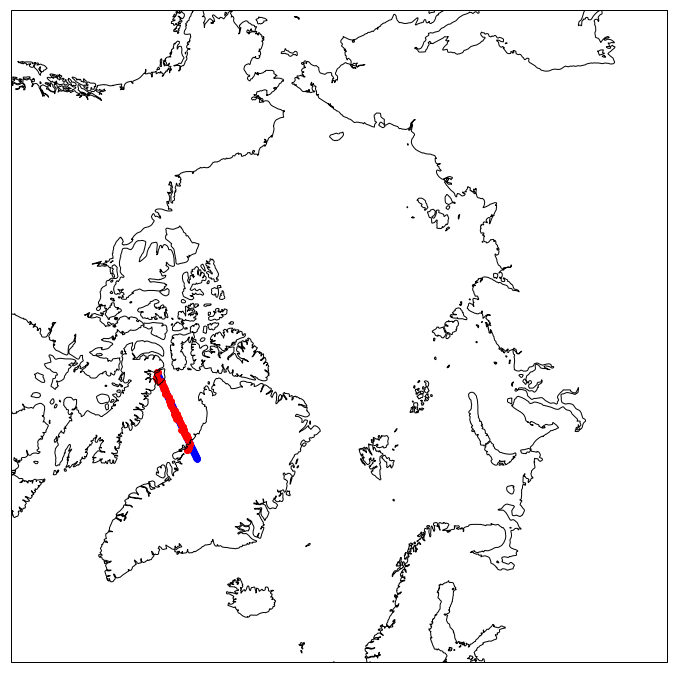

In [8]:
lon_start = -80
lat_start = 73
lon_end   = -50
lat_end   = 73
npoints = int((lon_end-lon_start)*10)
plt.figure(figsize=(10,10))
pf.plot_transect_map(lon_start, lat_start, lon_end, lat_end, 
                       mesh, npoints=npoints, view = 'np', stock_img=False)

In [9]:
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints=npoints)
dist   = pf.transect_get_distance(lonlat) # get's distances between starting point and present point
nodes  = pf.transect_get_nodes(lonlat, mesh)
profile = pf.transect_get_profile(nodes, mesh)
depth = -mesh.zlevs

area = np.empty((47, int(npoints)))
area[:,:] = np.nan
print np.shape(area)
for i in np.arange(0,int(npoints)):
    area[:-2,i] = np.mean(np.diff(dist*1000)) * np.diff(-depth)

print np.shape(area)
print npoints

(47, 300)
(47, 300)
300


In [10]:
U = np.empty((47, int(npoints)))
V = np.empty((47, int(npoints)))
DIN = np.empty((47, int(npoints)))
TRANSPORT = np.array([])
TRANSPORT_DIN = np.array([])

for year in years:
    print year
    ncfile = resultpath+runid+'.'+str(year)+'.oce.mean.nc'
    f      = Dataset(ncfile, 'r')
    for mo in months:

        if mo ==0: 
            dayind = (range(0,15))
            month='JAN'
        if mo ==1: 
            dayind = (range(15,30))
            month='FEV'
        if mo ==2: 
            dayind = (range(30,45))
            month='MAR'
        if mo ==3: 
            dayind = (range(45,60))
            month='APR'
        elif mo ==4: 
            dayind = (range(60,75))
            month='MAY'
        elif mo ==5: 
            dayind = (range(75,90))
            month='JUN'
        elif mo ==6: 
            dayind = (range(90,105))
            month='JUL'
        elif mo ==7:
            dayind = (range(105,120))
            month='AUG'
        elif mo ==8: 
            dayind = (range(120,135))
            month='SEP'
        elif mo ==9: 
            dayind = (range(135,150))
            month='OCT'
        elif mo ==10: 
            dayind = (range(150,165))
            month='NOV'
        elif mo ==11: 
            dayind = (range(165,167))
            month='DEC'
        #print month
        #print 'loading variable from netcdf file...'
        if year<2000:
            rot_u, rot_v, dist, profile = pf.transect_uv(f.variables['u'][mo,:],
                                             f.variables['v'][mo,:],
                                             mesh,
                                             lon_start,
                                             lat_start,
                                             lon_end,
                                             lat_end,
                                             npoints=npoints,
                                             myangle=0)
            din = pf.transect_get_data(f.variables['tr01'][mo,:],profile)
            din = din.T

        else:
            rot_u, rot_v, dist, profile = pf.transect_uv(f.variables['u'][dayind,:].mean(axis=0),
                                             f.variables['v'][dayind,:].mean(axis=0),
                                             mesh,
                                             lon_start,
                                             lat_start,
                                             lon_end,
                                             lat_end,
                                             npoints=npoints,
                                             myangle=0)
            din = pf.transect_get_data(f.variables['tr01'][dayind,:].mean(axis=0),profile)
            din = din.T
        
        rot_u = np.ma.array(rot_u, mask = din.mask)
        rot_v = np.ma.array(rot_v, mask = din.mask)
        area = np.ma.array(area, mask = din.mask)
        
        transport_din = np.nansum(np.nansum(rot_v * din * area))
        #transport_din[np.where(profile<0)] = np.nan
        transport = np.nansum(np.nansum(rot_v * area))
        #transport[np.where(profile<0)] = np.nan
        
        #print 'loading section data...'
        #print 'concatenation...'
        #DATA[i,:,:] = DATA[i,:,:] + section[:,0:21]
        #DATA = np.append(DATA, section[:,0:21], axis=2)
        #DATA.append(section[:,0:21])
        U = np.dstack([U,rot_u])
        V = np.dstack([V,rot_v])
        DIN = np.dstack([DIN,din])
        TRANSPORT = np.hstack((TRANSPORT, transport))
        TRANSPORT_DIN = np.hstack((TRANSPORT_DIN, transport_din))
        
df['DAVIS_DIN_transport'] = TRANSPORT_DIN
df['DAVIS_VOL_transport'] = TRANSPORT

1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


# Extract Bering Strait

<Figure size 720x720 with 0 Axes>

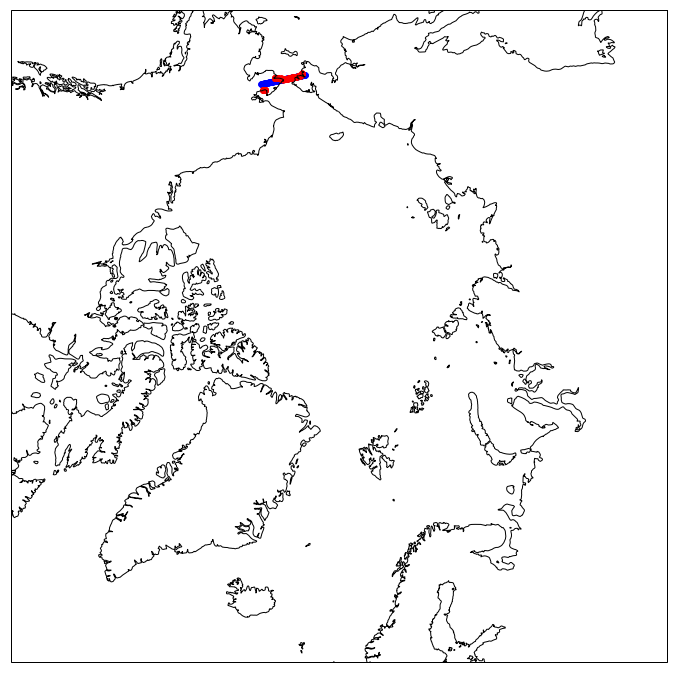

In [11]:
lon_start = -173
lat_start = 65.5
lon_end   = -163
lat_end   = 65.5
npoints = round((lon_end-lon_start)*10)
plt.figure(figsize=(10,10))
pf.plot_transect_map(lon_start, lat_start, lon_end, lat_end, 
                       mesh, npoints=npoints, view = 'np', stock_img=False)

In [12]:
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints=npoints)
dist   = pf.transect_get_distance(lonlat) # get's distances between starting point and present point
nodes  = pf.transect_get_nodes(lonlat, mesh)
profile = pf.transect_get_profile(nodes, mesh)
depth = -mesh.zlevs

area = np.empty((47, int(npoints)))
area[:,:] = np.nan
print np.shape(area)
for i in np.arange(0,int(npoints)):
    area[:-2,i] = np.mean(np.diff(dist*1000)) * np.diff(-depth)

print np.shape(area)
print npoints

(47, 100)
(47, 100)
100.0


In [13]:
U = np.empty((47, int(npoints)))
V = np.empty((47, int(npoints)))
DIN = np.empty((47, int(npoints)))
TRANSPORT = np.array([])
TRANSPORT_DIN = np.array([])

for year in years:
    print year
    ncfile = resultpath+runid+'.'+str(year)+'.oce.mean.nc'
    f      = Dataset(ncfile, 'r')
    for mo in months:

        if mo ==0: 
            dayind = (range(0,15))
            month='JAN'
        if mo ==1: 
            dayind = (range(15,30))
            month='FEV'
        if mo ==2: 
            dayind = (range(30,45))
            month='MAR'
        if mo ==3: 
            dayind = (range(45,60))
            month='APR'
        elif mo ==4: 
            dayind = (range(60,75))
            month='MAY'
        elif mo ==5: 
            dayind = (range(75,90))
            month='JUN'
        elif mo ==6: 
            dayind = (range(90,105))
            month='JUL'
        elif mo ==7:
            dayind = (range(105,120))
            month='AUG'
        elif mo ==8: 
            dayind = (range(120,135))
            month='SEP'
        elif mo ==9: 
            dayind = (range(135,150))
            month='OCT'
        elif mo ==10: 
            dayind = (range(150,165))
            month='NOV'
        elif mo ==11: 
            dayind = (range(165,167))
            month='DEC'
        #print month
        #print 'loading variable from netcdf file...'
        if year<2000:
            rot_u, rot_v, dist, profile = pf.transect_uv(f.variables['u'][mo,:],
                                             f.variables['v'][mo,:],
                                             mesh,
                                             lon_start,
                                             lat_start,
                                             lon_end,
                                             lat_end,
                                             npoints=npoints,
                                             myangle=0)
            din = pf.transect_get_data(f.variables['tr01'][mo,:],profile)
            din = din.T

        else:
            rot_u, rot_v, dist, profile = pf.transect_uv(f.variables['u'][dayind,:].mean(axis=0),
                                             f.variables['v'][dayind,:].mean(axis=0),
                                             mesh,
                                             lon_start,
                                             lat_start,
                                             lon_end,
                                             lat_end,
                                             npoints=npoints,
                                             myangle=0)
            din = pf.transect_get_data(f.variables['tr01'][dayind,:].mean(axis=0),profile)
            din = din.T
        
        rot_u = np.ma.array(rot_u, mask = din.mask)
        rot_v = np.ma.array(rot_v, mask = din.mask)
        area = np.ma.array(area, mask = din.mask)
        
        transport_din = np.nansum(np.nansum(rot_v * din * area))
        #transport_din[np.where(profile<0)] = np.nan
        transport = np.nansum(np.nansum(rot_v * area))
        #transport[np.where(profile<0)] = np.nan
        
        #print 'loading section data...'
        #print 'concatenation...'
        #DATA[i,:,:] = DATA[i,:,:] + section[:,0:21]
        #DATA = np.append(DATA, section[:,0:21], axis=2)
        #DATA.append(section[:,0:21])
        U = np.dstack([U,rot_u])
        V = np.dstack([V,rot_v])
        DIN = np.dstack([DIN,din])
        TRANSPORT = np.hstack((TRANSPORT, transport))
        TRANSPORT_DIN = np.hstack((TRANSPORT_DIN, transport_din))
        
df['BERING_DIN_transport'] = TRANSPORT_DIN
df['BERING_VOL_transport'] = TRANSPORT

1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


# Extract Fram Strait

<Figure size 720x720 with 0 Axes>

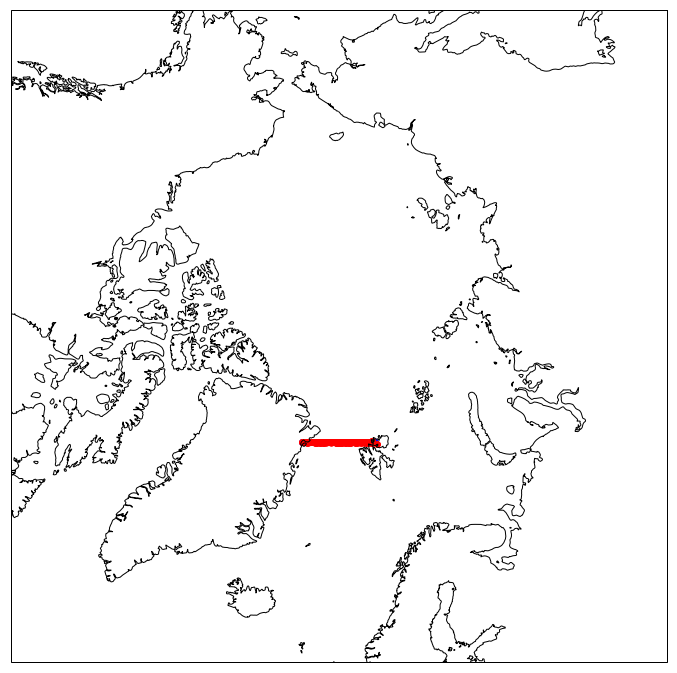

In [14]:
lon_start = -20
lat_start = 80
lon_end   = 20
lat_end   = 80
npoints = (lon_end-lon_start)*10

plt.figure(figsize=(10,10))
pf.plot_transect_map(lon_start, lat_start, lon_end, lat_end, 
                       mesh, npoints=npoints, view = 'np', stock_img=False)

In [15]:
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints=npoints)
dist   = pf.transect_get_distance(lonlat) # get's distances between starting point and present point
nodes  = pf.transect_get_nodes(lonlat, mesh)
profile = pf.transect_get_profile(nodes, mesh)
depth = -mesh.zlevs

area = np.empty((47, int(npoints)))
area[:,:] = np.nan
print np.shape(area)
for i in np.arange(0,int(npoints)):
    area[:-2,i] = np.mean(np.diff(dist*1000)) * np.diff(-depth)

print np.shape(area)
print npoints

(47, 400)
(47, 400)
400


In [16]:
U = np.empty((47, int(npoints)))
V = np.empty((47, int(npoints)))
DIN = np.empty((47, int(npoints)))
TRANSPORT = np.array([])
TRANSPORT_DIN = np.array([])

for year in years:
    print year
    ncfile = resultpath+runid+'.'+str(year)+'.oce.mean.nc'
    f      = Dataset(ncfile, 'r')
    for mo in months:

        if mo ==0: 
            dayind = (range(0,15))
            month='JAN'
        if mo ==1: 
            dayind = (range(15,30))
            month='FEV'
        if mo ==2: 
            dayind = (range(30,45))
            month='MAR'
        if mo ==3: 
            dayind = (range(45,60))
            month='APR'
        elif mo ==4: 
            dayind = (range(60,75))
            month='MAY'
        elif mo ==5: 
            dayind = (range(75,90))
            month='JUN'
        elif mo ==6: 
            dayind = (range(90,105))
            month='JUL'
        elif mo ==7:
            dayind = (range(105,120))
            month='AUG'
        elif mo ==8: 
            dayind = (range(120,135))
            month='SEP'
        elif mo ==9: 
            dayind = (range(135,150))
            month='OCT'
        elif mo ==10: 
            dayind = (range(150,165))
            month='NOV'
        elif mo ==11: 
            dayind = (range(165,167))
            month='DEC'
        #print month
        #print 'loading variable from netcdf file...'
        if year<2000:
            rot_u, rot_v, dist, profile = pf.transect_uv(f.variables['u'][mo,:],
                                             f.variables['v'][mo,:],
                                             mesh,
                                             lon_start,
                                             lat_start,
                                             lon_end,
                                             lat_end,
                                             npoints=npoints,
                                             myangle=0)
            din = pf.transect_get_data(f.variables['tr01'][mo,:],profile)
            din = din.T

        else:
            rot_u, rot_v, dist, profile = pf.transect_uv(f.variables['u'][dayind,:].mean(axis=0),
                                             f.variables['v'][dayind,:].mean(axis=0),
                                             mesh,
                                             lon_start,
                                             lat_start,
                                             lon_end,
                                             lat_end,
                                             npoints=npoints,
                                             myangle=0)
            din = pf.transect_get_data(f.variables['tr01'][dayind,:].mean(axis=0),profile)
            din = din.T
        
        rot_u = np.ma.array(rot_u, mask = din.mask)
        rot_v = np.ma.array(rot_v, mask = din.mask)
        area = np.ma.array(area, mask = din.mask)
        
        transport_din = np.nansum(np.nansum(rot_v * din * area))
        #transport_din[np.where(profile<0)] = np.nan
        transport = np.nansum(np.nansum(rot_v * area))
        #transport[np.where(profile<0)] = np.nan
        
        #print 'loading section data...'
        #print 'concatenation...'
        #DATA[i,:,:] = DATA[i,:,:] + section[:,0:21]
        #DATA = np.append(DATA, section[:,0:21], axis=2)
        #DATA.append(section[:,0:21])
        U = np.dstack([U,rot_u])
        V = np.dstack([V,rot_v])
        DIN = np.dstack([DIN,din])
        TRANSPORT = np.hstack((TRANSPORT, transport))
        TRANSPORT_DIN = np.hstack((TRANSPORT_DIN, transport_din))
        
df['FRAM_DIN_transport'] = TRANSPORT_DIN
df['FRAM_VOL_transport'] = TRANSPORT

1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


# Extract BSO

<Figure size 720x720 with 0 Axes>

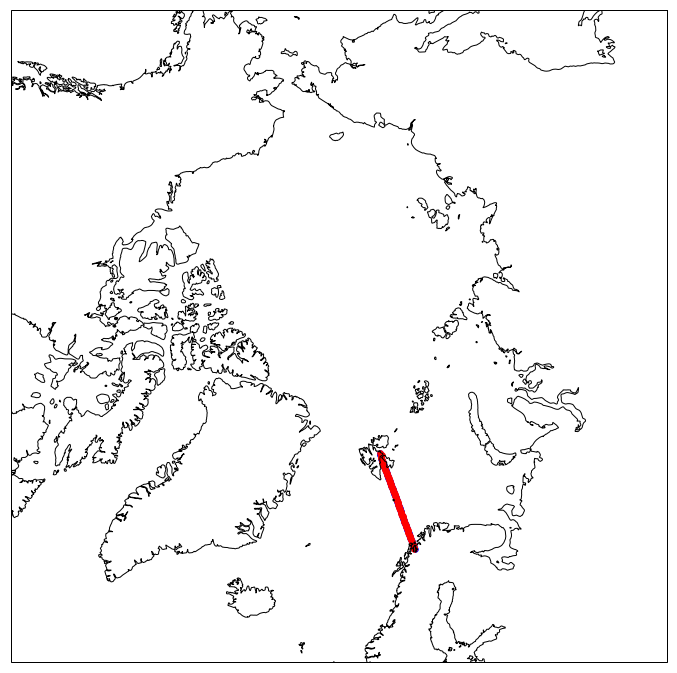

In [17]:
lon_start = 20
lat_start = 69.5
lon_end   = 20
lat_end   = 79

npoints = (lat_end-lat_start)*10

plt.figure(figsize=(10,10))
pf.plot_transect_map(lon_start, lat_start, lon_end, lat_end, 
                       mesh, npoints=npoints, view = 'np', stock_img=False)

In [18]:
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints=npoints)
dist   = pf.transect_get_distance(lonlat) # get's distances between starting point and present point
nodes  = pf.transect_get_nodes(lonlat, mesh)
profile = pf.transect_get_profile(nodes, mesh)
depth = -mesh.zlevs

area = np.empty((47, int(npoints)))
area[:,:] = np.nan
print np.shape(area)
for i in np.arange(0,int(npoints)):
    area[:-2,i] = np.mean(np.diff(dist*1000)) * np.diff(-depth)

print np.shape(area)
print npoints

(47, 95)
(47, 95)
95.0


In [19]:
# fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
# plt.plot(depth,'.-')
# print -depth
# print np.diff(-depth)
# print np.diff(-depth)*np.mean(np.diff(dist*1000))

# plt.plot(np.diff(-depth)*np.mean(np.diff(dist*1000)))

In [20]:
# CHECK AREA 
# fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
# xxi, yyi = np.meshgrid(dist,-depth)
# print np.shape(depth)
# print np.shape(xxi)
# print np.shape(yyi)

# plt.contourf(area, levels = np.arange(0,3000000,100000))
# plt.colorbar()
# plt.show()
# #plt.ylim(0,500)
# print np.shape(area)
# print area

In [21]:
# fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
# plt.contourf(area)
# plt.colorbar()
# plt.show()
# print np.shape(area)
# print area

In [22]:
U = np.empty((47, int(npoints)))
V = np.empty((47, int(npoints)))
DIN = np.empty((47, int(npoints)))
TRANSPORT = np.array([])
TRANSPORT_DIN = np.array([])

for year in years:
    print year
    ncfile = resultpath+runid+'.'+str(year)+'.oce.mean.nc'
    f      = Dataset(ncfile, 'r')
    for mo in months:

        if mo ==0: 
            dayind = (range(0,15))
            month='JAN'
        if mo ==1: 
            dayind = (range(15,30))
            month='FEV'
        if mo ==2: 
            dayind = (range(30,45))
            month='MAR'
        if mo ==3: 
            dayind = (range(45,60))
            month='APR'
        elif mo ==4: 
            dayind = (range(60,75))
            month='MAY'
        elif mo ==5: 
            dayind = (range(75,90))
            month='JUN'
        elif mo ==6: 
            dayind = (range(90,105))
            month='JUL'
        elif mo ==7:
            dayind = (range(105,120))
            month='AUG'
        elif mo ==8: 
            dayind = (range(120,135))
            month='SEP'
        elif mo ==9: 
            dayind = (range(135,150))
            month='OCT'
        elif mo ==10: 
            dayind = (range(150,165))
            month='NOV'
        elif mo ==11: 
            dayind = (range(165,167))
            month='DEC'
        #print month
        #print 'loading variable from netcdf file...'
        if year<2000:
            rot_u, rot_v, dist, profile = pf.transect_uv(f.variables['u'][mo,:],
                                             f.variables['v'][mo,:],
                                             mesh,
                                             lon_start,
                                             lat_start,
                                             lon_end,
                                             lat_end,
                                             npoints=npoints,
                                             myangle=0)
            din = pf.transect_get_data(f.variables['tr01'][mo,:],profile)
            din = din.T

        else:
            rot_u, rot_v, dist, profile = pf.transect_uv(f.variables['u'][dayind,:].mean(axis=0),
                                             f.variables['v'][dayind,:].mean(axis=0),
                                             mesh,
                                             lon_start,
                                             lat_start,
                                             lon_end,
                                             lat_end,
                                             npoints=npoints,
                                             myangle=0)
            din = pf.transect_get_data(f.variables['tr01'][dayind,:].mean(axis=0),profile)
            din = din.T
        
        rot_u = np.ma.array(rot_u, mask = din.mask)
        rot_v = np.ma.array(rot_v, mask = din.mask)
        area = np.ma.array(area, mask = din.mask)
        
        transport_din = np.nansum(np.nansum(rot_u * din * area))
        #transport_din[np.where(profile<0)] = np.nan
        transport = np.nansum(np.nansum(rot_u * area))
        #transport[np.where(profile<0)] = np.nan
        
        #print 'loading section data...'
        #print 'concatenation...'
        #DATA[i,:,:] = DATA[i,:,:] + section[:,0:21]
        #DATA = np.append(DATA, section[:,0:21], axis=2)
        #DATA.append(section[:,0:21])
        U = np.dstack([U,rot_u])
        V = np.dstack([V,rot_v])
        DIN = np.dstack([DIN,din])
        TRANSPORT = np.hstack((TRANSPORT, transport))
        TRANSPORT_DIN = np.hstack((TRANSPORT_DIN, transport_din))
        
df['BSO_DIN_transport'] = TRANSPORT_DIN
df['BSO_VOL_transport'] = TRANSPORT

1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


# Export

In [23]:
df.to_pickle('Transects_transport')

# Visual inspection

In [24]:
print din.shape
print DIN.shape
print profile.shape
print rot_u.shape
print transport.shape

(47, 95)
(47, 95, 373)
(95, 47)
(47, 95)
()


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


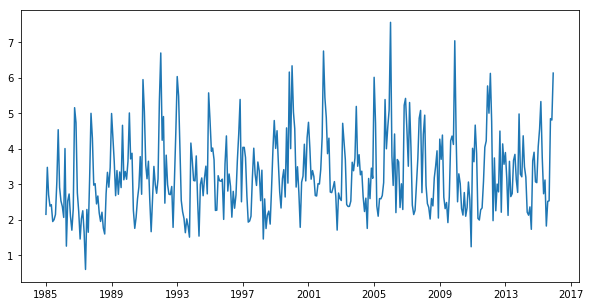

In [40]:
fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
plt.plot(dates,TRANSPORT/10**6)

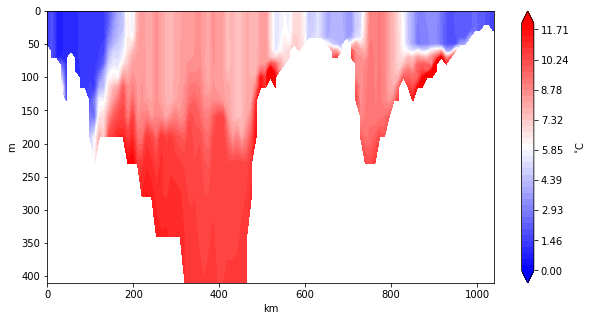

In [26]:
fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
pf.plot_transect(din, 
                 mesh, 
                 lon_start, 
                 lat_start,
                 lon_end,
                 lat_end,
                 npoints=npoints, 
                 transect_data=np.ma.masked_equal(din, 0).T, 
                 profile=profile, 
                 levels= np.round(np.linspace(0, 12, 42),4), 
                 cmap=cm.bwr, maxdepth=500)

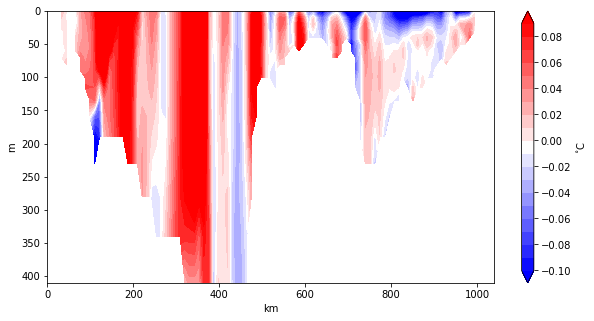

In [27]:
rot_u_new = np.ma.array(rot_u, mask = din.mask)
    
fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
pf.plot_transect(din, 
                 mesh, 
                 lon_start, 
                 lat_start,
                 lon_end,
                 lat_end,
                 npoints=npoints, 
                 transect_data=np.ma.masked_equal(rot_u_new, 0).T, 
                 profile=profile, 
                 levels= np.arange(-0.1, 0.1, 0.01), 
                 cmap=cm.bwr, maxdepth=500)

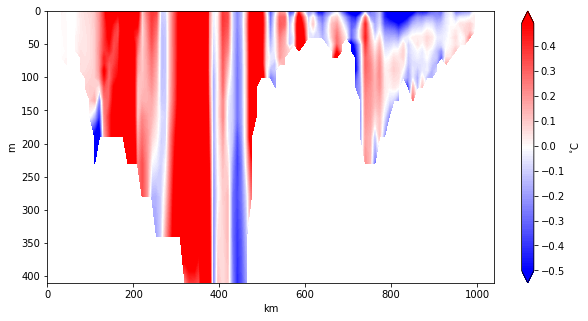

In [28]:
fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
pf.plot_transect(din, 
                 mesh, 
                 lon_start, 
                 lat_start,
                 lon_end,
                 lat_end,
                 npoints=npoints, 
                 transect_data=np.ma.masked_equal(rot_u*din, 0).T, 
                 profile=profile, 
                 levels= np.arange(-0.5, 0.5, 0.01), 
                 cmap=cm.bwr, maxdepth=500)

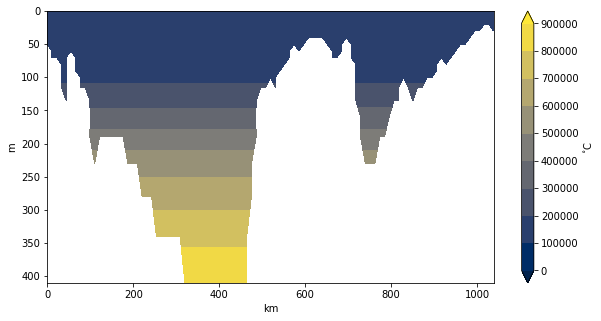

In [29]:
fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
pf.plot_transect(din, 
                 mesh, 
                 lon_start, 
                 lat_start,
                 lon_end,
                 lat_end,
                 npoints=npoints, 
                 transect_data=np.ma.masked_equal(area, 0).T, 
                 profile=profile, 
                 levels= np.arange(0, 1000000, 100000), 
                 cmap=cm.cividis, maxdepth=500)

In [30]:
area[din.mask]

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

In [31]:
# labeles = [str(abs(int(x)))+"$^{\circ}$S" for x in lonlat[7::8][:,1]]
# labeles

# fig, ax = plt.subplots(1,1, figsize=(15,7))
# image = pf.plot_transect(f.variables['u'][dayind,:].mean(axis=0), mesh, 
#                          lon_start,
#                          lat_start,
#                          lon_end,
#                          lat_end,
#                          npoints=npoints,
#                          levels = np.round(np.linspace(-0.03, 0.03, 42),4),
#                          cmap=cm.bwr,
#                          maxdepth = 600,
#                          ncols=1,
#                          figsize=(5,10),
#                         ax = ax
#                         )

# ax.xaxis.set_ticks(dist[7::8])
# ax.set_xticklabels(labeles, size=20);

[11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522 11.04460522
 11.04460522 11.04460522 11.04460522 11.04460522 11

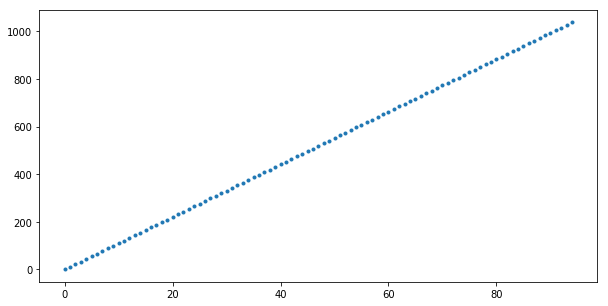

In [32]:
fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
plt.plot(dist,'.')
print np.diff(dist)

[11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60521611 11044.60521611 11044.60521611
 11044.60521611 11044.60

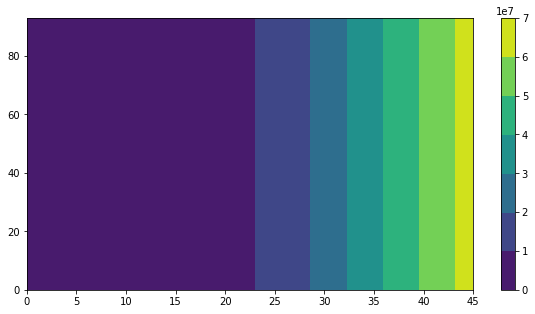

In [33]:
area = -depth * np.reshape(np.diff(dist*1000), (-1,1))
dist_step = np.diff(dist*1000)
np.shape(dist_step)
print dist_step[0:100]
#plt.plot(dist_step)
#plt.plot(depth)
#plt.plot(area[:].flatten(),'.')
fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
plt.contourf(area)
plt.colorbar()
plt.show()
# pf.plot_transect(area, 
#                  mesh, 
#                  lon_start, 
#                  lat_start,
#                  lon_end,
#                  lat_end,
#                  npoints=npoints, 
#                  transect_data=np.ma.masked_equal(area, 0), 
#                  profile=profile, 
#                  levels= np.round(np.linspace(0, 30, 42),4), 
#                  cmap=cm.bwr, maxdepth=500)

In [34]:
# U[np.abs(U)>5]=np.nan
# plt.plot(U.flatten())

In [35]:
# fig, ax = plt.subplots(1,1, figsize=(15,7))
# p = ax.contourf(lonlat[:,1],-depth,U[:,:,1],100,vmin=-0.1,vmax=.1)
# fig.colorbar(p, ax=ax)

In [36]:
# fig, ax = plt.subplots(1,1, figsize=(15,7))
# p = ax.contourf(lonlat[:,1],-depth,DATA2[:,:,0],100,vmin=-0.1,vmax=0.1)
# fig.colorbar(p, ax=ax)

In [37]:
outfile = outputpath+'BSO_U.npy'
np.save(outfile, U.data, allow_pickle=True, fix_imports=True)

In [38]:
outfile = outputpath+'BSOdepth.npy'
np.save(outfile, depth, allow_pickle=True, fix_imports=True)

In [39]:
outfile = outputpath+'BSOlonlat.npy'
np.save(outfile, lonlat, allow_pickle=True, fix_imports=True)